In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import folium
from folium import plugins

import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/csvfile7/mycsvfile7.csv
/kaggle/input/csvfile8/mycsvfile8.csv


In [2]:
data = pd.read_csv("/kaggle/input/csvfile8/mycsvfile8.csv")
data.head()

,Unnamed: 0,No,Olus tarihi,Olus zamani,Enlem,Boylam,Der(km),xM,MD,Tip,Yer,new,new2,Date,Date2,year
0,0,1,2021-03-31,23:09:45.03,350232,271395,12.0,3.5,0.0,Ke,GIRIT ADASI ACIKLARI (AKDENIZ),2021-03-31,2021.243836,31032021,32021,2021
1,1,2,2021-03-30,20:54:01.35,378915,271335,4.2,3.5,0.0,Ke,KUSADASI KORFEZI (EGE DENIZI),2021-03-30,2021.241096,30032021,32021,2021
2,2,3,2021-03-28,23:26:11.93,358712,274998,10.2,3.6,0.0,Ke,AKDENIZ,2021-03-28,2021.235616,28032021,32021,2021
3,3,4,2021-03-28,13:26:32.30,389575,260637,5.0,3.5,0.0,Ke,EGE DENIZI,2021-03-28,2021.235616,28032021,32021,2021
4,4,5,2021-03-28,04:46:16.87,388995,260152,8.6,3.5,0.0,Ke,EGE DENIZI,2021-03-28,2021.235616,28032021,32021,2021


In [3]:
data2=pd.read_csv("/kaggle/input/csvfile8/mycsvfile8.csv")
data2.head()

,Unnamed: 0,No,Olus tarihi,Olus zamani,Enlem,Boylam,Der(km),xM,MD,Tip,Yer,new,new2,Date,Date2,year
0,0,1,2021-03-31,23:09:45.03,350232,271395,12.0,3.5,0.0,Ke,GIRIT ADASI ACIKLARI (AKDENIZ),2021-03-31,2021.243836,31032021,32021,2021
1,1,2,2021-03-30,20:54:01.35,378915,271335,4.2,3.5,0.0,Ke,KUSADASI KORFEZI (EGE DENIZI),2021-03-30,2021.241096,30032021,32021,2021
2,2,3,2021-03-28,23:26:11.93,358712,274998,10.2,3.6,0.0,Ke,AKDENIZ,2021-03-28,2021.235616,28032021,32021,2021
3,3,4,2021-03-28,13:26:32.30,389575,260637,5.0,3.5,0.0,Ke,EGE DENIZI,2021-03-28,2021.235616,28032021,32021,2021
4,4,5,2021-03-28,04:46:16.87,388995,260152,8.6,3.5,0.0,Ke,EGE DENIZI,2021-03-28,2021.235616,28032021,32021,2021


In [4]:
data3 = pd.read_csv("/kaggle/input/csvfile8/mycsvfile8.csv")
data3.shape

(16018, 16)

**Aydın Enlem Boylam verme**

In [5]:
data.drop(data[data['Enlem'] < 373442].index, inplace = True)
data.drop(data[data['Enlem'] > 381240].index, inplace = True)
data.drop(data[data['Boylam'] < 270080].index, inplace = True)
data.drop(data[data['Boylam'] > 288427].index, inplace = True)
data.head(10)

,Unnamed: 0,No,Olus tarihi,Olus zamani,Enlem,Boylam,Der(km),xM,MD,Tip,Yer,new,new2,Date,Date2,year
1,1,2,2021-03-30,20:54:01.35,378915,271335,4.2,3.5,0.0,Ke,KUSADASI KORFEZI (EGE DENIZI),2021-03-30,2021.241096,30032021,32021,2021
120,120,121,2020-12-23,11:06:29.65,378888,276075,3.2,3.7,0.0,Ke,DAGKARAAGAC-GERMENCIK (AYDIN) [South 1.4 km],2020-12-23,2020.975410,23122020,122020,2020
130,130,131,2020-12-13,05:25:44.32,376830,270502,6.8,3.5,0.0,Ke,MILLI PARK-KUSADASI (AYDIN) [North East 1.2 km],2020-12-13,2020.948087,13122020,122020,2020
165,165,166,2020-11-17,23:00:53.52,377053,270598,4.2,3.9,0.0,Ke,MILLI PARK-KUSADASI (AYDIN) [North East 3.6 km],2020-11-17,2020.877049,17112020,112020,2020
167,167,168,2020-11-17,17:59:50.68,380288,270780,5.2,3.7,0.0,Ke,KUSADASI KORFEZI (EGE DENIZI),2020-11-17,2020.877049,17112020,112020,2020
195,195,196,2020-11-05,12:40:07.24,378670,272913,7.6,3.6,0.0,Ke,KUSADASI (AYDIN) [North East 2.8 km],2020-11-05,2020.844262,5112020,112020,2020
201,201,202,2020-11-04,02:24:16.86,377225,270305,4.1,3.8,0.0,Ke,SISAM ADASI (EGE DENIZI),2020-11-04,2020.841530,4112020,112020,2020
202,202,203,2020-11-03,23:56:10.19,377343,270205,4.1,3.5,0.0,Ke,SISAM ADASI (EGE DENIZI),2020-11-03,2020.838798,3112020,112020,2020
203,203,204,2020-11-03,23:37:44.19,377510,270225,4.7,3.7,0.0,Ke,SISAM ADASI (EGE DENIZI),2020-11-03,2020.838798,3112020,112020,2020
204,204,205,2020-11-03,23:37:01.17,377487,270305,5.4,3.5,0.0,Ke,SISAM ADASI (EGE DENIZI),2020-11-03,2020.838798,3112020,112020,2020


In [6]:
data.shape

(263, 16)

In [7]:
import folium
from folium import plugins

n = folium.Map(location=[38,34], tiles="OpenStreetMap", zoom_start=6,  width="%100",
height="%100",)

    
for index, row in data.iterrows():
    folium.CircleMarker(location=[((row["Enlem"]-(row["Enlem"]/10000))/10000), ((row["Boylam"]-(row["Boylam"]/10000))/10000)], radius=0.3, color='purple',).add_to(n)

n

faylarla karşılaştır

**DB SCAN**

In [8]:
x=data.iloc[:,[6,12]].values

In [9]:
x.shape

(263, 2)

In [10]:
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=3,min_samples=4,metric='euclidean')

In [11]:
model=db.fit(x)

In [12]:
label=model.labels_

In [13]:
from sklearn import metrics

#identifying the points which makes up our core points
sample_cores=np.zeros_like(label,dtype=bool)

sample_cores[db.core_sample_indices_]=True

#Calculating the number of clusters

n_clusters=len(set(label))- (1 if -1 in label else 0)
print('No of clusters:',n_clusters)

No of clusters: 7


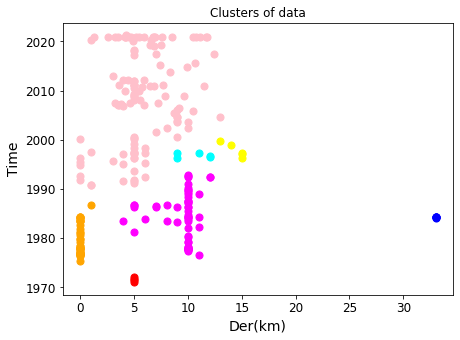

In [14]:
y_means = db.fit_predict(x)
plt.figure(figsize=(7,5))
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 50, c = 'pink')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 50, c = 'yellow')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 50, c = 'cyan')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 50, c = 'magenta')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 50, c = 'orange')
plt.scatter(x[y_means == 5, 0], x[y_means == 5, 1], s = 50, c = 'blue')
plt.scatter(x[y_means == 6, 0], x[y_means == 6, 1], s = 50, c = 'red')
plt.scatter(x[y_means == 7, 0], x[y_means == 7, 1], s = 50, c = 'black')
plt.scatter(x[y_means == 8, 0], x[y_means == 8, 1], s = 50, c = 'violet')
plt.xlabel('Der(km)')
plt.ylabel('Time')
plt.title('Clusters of data')
plt.show()

**Clustering**

/opt/conda/lib/python3.7/site-packages/yellowbrick/utils/kneed.py:155: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/opt/conda/lib/python3.7/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


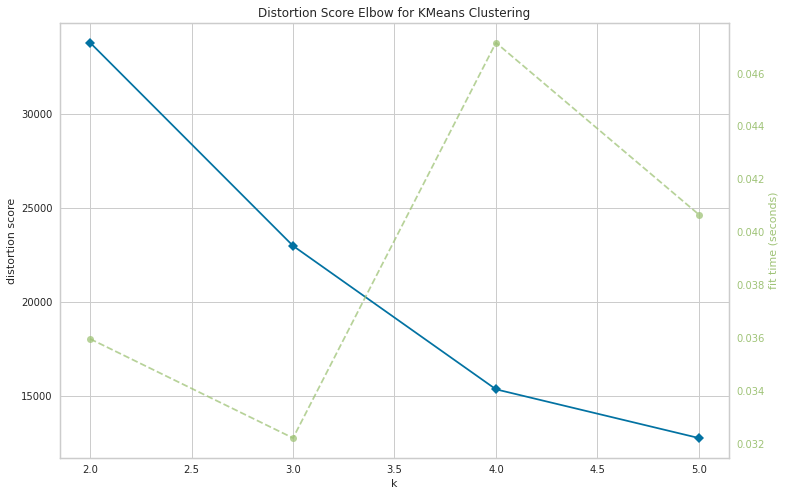

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [15]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

fig = plt.figure(figsize=(12,8))

# KNears Neighbors 
data.head()

X = data[["Der(km)", "new2"]]


# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,6))

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof()

In [16]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=4)  
kmeans.fit(X)

KMeans(n_clusters=4)

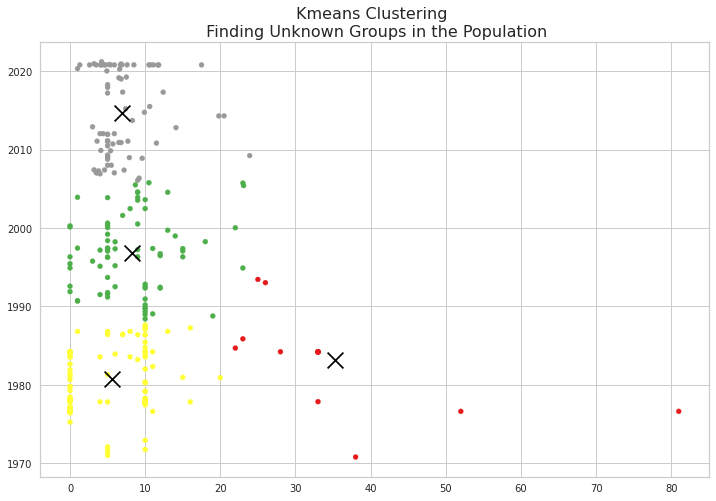

In [17]:
fig = plt.figure(figsize=(12,8))

plt.scatter(X.values[:,0], X.values[:,1], c=kmeans.labels_, cmap="Set1_r", s=25)
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black', marker="x", s=250)
plt.title("Kmeans Clustering \n Finding Unknown Groups in the Population", fontsize=16)
plt.show()

**3D Clustering**

In [18]:
# import the libraries
import numpy as np
import pandas as pd 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py

In [19]:
# input matrix for segmentation
x = data[['Der(km)','new2','Enlem', 'Boylam']].values

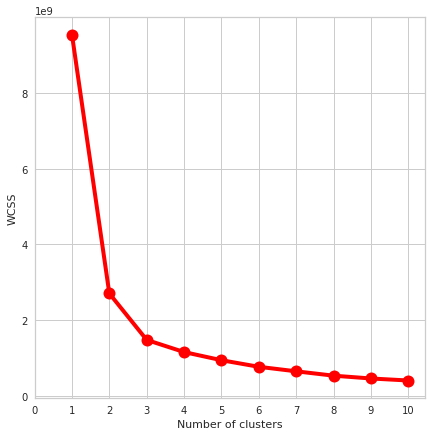

In [20]:
# find the optimal number of clusters using elbow method  -- >This is for 3 features = [age,anual income,spending score]

WCSS = []
for i in range(1,11):
    model = KMeans(n_clusters = i,init = 'k-means++')
    model.fit(x)
    WCSS.append(model.inertia_)
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,11),WCSS, linewidth=4, markersize=12,marker='o',color = 'red')
plt.xticks(np.arange(11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [21]:
# finding the clusters based on input matrix "x"
model = KMeans(n_clusters = 4, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_clusters = model.fit_predict(x)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:ylabel='count'>

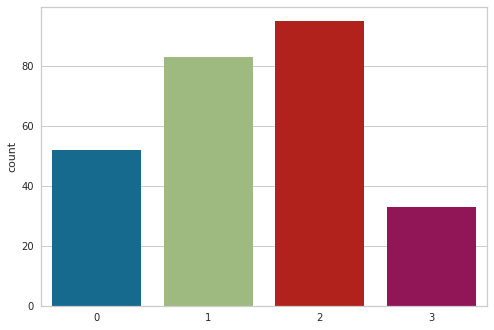

In [22]:
# countplot to check the number of clusters and number of customers in each cluster
#boylamın çok etkili olmadığını gördük
sns.countplot(y_clusters)

In [23]:
print(x[y_clusters == 0,0][1])
print(x[y_clusters == 0,1][1])
print(x[y_clusters == 0,2][1])

6.5
2019.1890410958904
378878.0


In [24]:
# 3d scatterplot using plotly
Scene = dict(xaxis = dict(title  = 'Derinlik'),yaxis = dict(title  = 'Zaman'),zaxis = dict(title  = 'Enlem'))

# model.labels_ is nothing but the predicted clusters i.e y_clusters
labels = model.labels_
trace = go.Scatter3d(x=x[:, 0], y=x[:, 1], z=x[:, 2], mode='markers',marker=dict(color = labels, size= 10, line=dict(color= 'black',width = 10)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()


**Kuşadası**

In [25]:
data4 = data3[data3['Yer'].str.contains('KUSADASI')]

In [26]:
data4.shape

(183, 16)

In [27]:
data4.head()

,Unnamed: 0,No,Olus tarihi,Olus zamani,Enlem,Boylam,Der(km),xM,MD,Tip,Yer,new,new2,Date,Date2,year
1,1,2,2021-03-30,20:54:01.35,378915,271335,4.2,3.5,0.0,Ke,KUSADASI KORFEZI (EGE DENIZI),2021-03-30,2021.241096,30032021,32021,2021
32,32,33,2021-02-12,10:03:13.30,378663,268685,6.1,3.5,0.0,Ke,KUSADASI KORFEZI (EGE DENIZI),2021-02-12,2021.115068,12022021,22021,2021
98,98,99,2021-01-15,17:20:09.80,378593,269300,7.6,4.1,0.0,Ke,KUSADASI KORFEZI (EGE DENIZI),2021-01-15,2021.038356,15012021,12021,2021
130,130,131,2020-12-13,05:25:44.32,376830,270502,6.8,3.5,0.0,Ke,MILLI PARK-KUSADASI (AYDIN) [North East 1.2 km],2020-12-13,2020.948087,13122020,122020,2020
134,134,135,2020-12-10,03:54:42.74,378320,269380,11.5,3.7,0.0,Ke,KUSADASI KORFEZI (EGE DENIZI),2020-12-10,2020.939891,10122020,122020,2020


In [28]:
import folium
from folium import plugins

n = folium.Map(location=[38,34], tiles="OpenStreetMap", zoom_start=6,  width="%100",
height="%100",)

    
for index, row in data4.iterrows():
    folium.CircleMarker(location=[((row["Enlem"]-(row["Enlem"]/10000))/10000), ((row["Boylam"]-(row["Boylam"]/10000))/10000)], radius=0.3, color='purple',).add_to(n)


n

**DB Scan**

In [29]:
data4.head()

,Unnamed: 0,No,Olus tarihi,Olus zamani,Enlem,Boylam,Der(km),xM,MD,Tip,Yer,new,new2,Date,Date2,year
1,1,2,2021-03-30,20:54:01.35,378915,271335,4.2,3.5,0.0,Ke,KUSADASI KORFEZI (EGE DENIZI),2021-03-30,2021.241096,30032021,32021,2021
32,32,33,2021-02-12,10:03:13.30,378663,268685,6.1,3.5,0.0,Ke,KUSADASI KORFEZI (EGE DENIZI),2021-02-12,2021.115068,12022021,22021,2021
98,98,99,2021-01-15,17:20:09.80,378593,269300,7.6,4.1,0.0,Ke,KUSADASI KORFEZI (EGE DENIZI),2021-01-15,2021.038356,15012021,12021,2021
130,130,131,2020-12-13,05:25:44.32,376830,270502,6.8,3.5,0.0,Ke,MILLI PARK-KUSADASI (AYDIN) [North East 1.2 km],2020-12-13,2020.948087,13122020,122020,2020
134,134,135,2020-12-10,03:54:42.74,378320,269380,11.5,3.7,0.0,Ke,KUSADASI KORFEZI (EGE DENIZI),2020-12-10,2020.939891,10122020,122020,2020


In [30]:
x2=data4.iloc[:,[6,12]].values

In [31]:
x2.shape

(183, 2)

In [32]:
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=3,min_samples=4,metric='euclidean')

In [33]:
model=db.fit(x2)

In [34]:
label=model.labels_

In [35]:
from sklearn import metrics

#identifying the points which makes up our core points
sample_cores=np.zeros_like(label,dtype=bool)

sample_cores[db.core_sample_indices_]=True

#Calculating the number of clusters

n_clusters=len(set(label))- (1 if -1 in label else 0)
print('No of clusters:',n_clusters)

No of clusters: 5


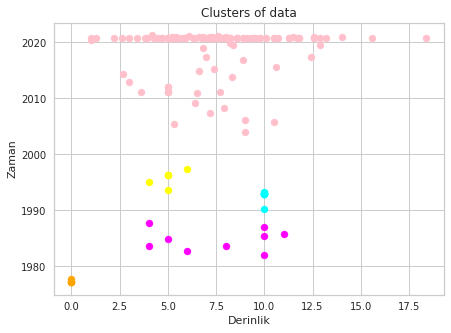

In [36]:
y_means = db.fit_predict(x2)
plt.figure(figsize=(7,5))
plt.scatter(x2[y_means == 0, 0], x2[y_means == 0, 1], s = 50, c = 'pink')
plt.scatter(x2[y_means == 1, 0], x2[y_means == 1, 1], s = 50, c = 'yellow')
plt.scatter(x2[y_means == 2, 0], x2[y_means == 2, 1], s = 50, c = 'cyan')
plt.scatter(x2[y_means == 3, 0], x2[y_means == 3, 1], s = 50, c = 'magenta')
plt.scatter(x2[y_means == 4, 0], x2[y_means == 4, 1], s = 50, c = 'orange')
plt.scatter(x2[y_means == 5, 0], x2[y_means == 5, 1], s = 50, c = 'blue')
plt.scatter(x2[y_means == 6, 0], x2[y_means == 6, 1], s = 50, c = 'red')
plt.scatter(x2[y_means == 7, 0], x2[y_means == 7, 1], s = 50, c = 'black')
plt.scatter(x2[y_means == 8, 0], x2[y_means == 8, 1], s = 50, c = 'violet')
plt.xlabel('Derinlik')
plt.ylabel('Zaman')
plt.title('Clusters of data')
plt.show()

**3D Clustering**

In [37]:
# import the libraries
import numpy as np
import pandas as pd 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py

In [38]:
# input matrix for segmentation
x3 = data4[['Der(km)','new2','Enlem', 'Boylam']].values

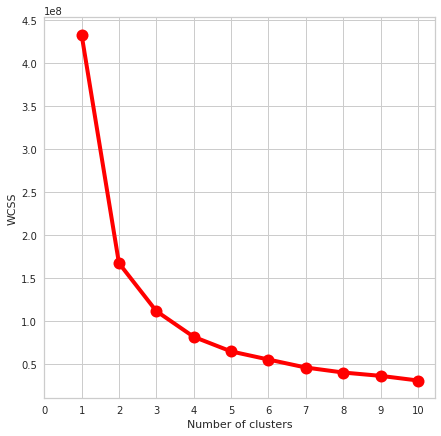

In [39]:
# find the optimal number of clusters using elbow method  -- >This is for 3 features = [age,anual income,spending score]

WCSS = []
for i in range(1,11):
    model = KMeans(n_clusters = i,init = 'k-means++')
    model.fit(x3)
    WCSS.append(model.inertia_)
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,11),WCSS, linewidth=4, markersize=12,marker='o',color = 'red')
plt.xticks(np.arange(11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [40]:
# finding the clusters based on input matrix "x"
model = KMeans(n_clusters = 4, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_clusters = model.fit_predict(x3)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:ylabel='count'>

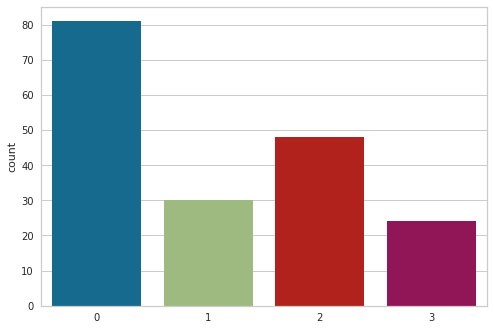

In [41]:
# countplot to check the number of clusters and number of customers in each cluster
#boylamın çok etkili olmadığını gördük
sns.countplot(y_clusters)

In [42]:
print(x3[y_clusters == 0,0][1])
print(x3[y_clusters == 0,1][1])
print(x3[y_clusters == 0,2][1])

7.6
2021.0383561643837
378593.0


In [43]:
# 3d scatterplot using plotly
Scene = dict(xaxis = dict(title  = 'Derinlik'),yaxis = dict(title  = 'Zaman'),zaxis = dict(title  = 'Enlem'))

# model.labels_ is nothing but the predicted clusters i.e y_clusters
labels = model.labels_
trace = go.Scatter3d(x=x3[:, 0], y=x3[:, 1], z=x3[:, 2], mode='markers',marker=dict(color = labels, size= 10, line=dict(color= 'black',width = 10)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()